<a href="https://colab.research.google.com/github/raulbenitez/NEUROIMAGING_AI/blob/main/Classification/PCA_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load MNIST dataset

In [4]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Load data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Visualize sample images and class

Text(0.5, 1.0, 'Image 112\xa0class label 1')

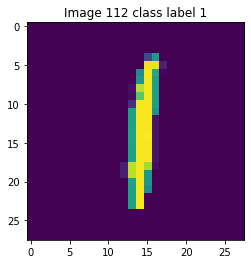

In [5]:
import matplotlib.pyplot as plt

k = 112
plt.imshow(x_train[k])
plt.title('Image {} class label {}'.format(k, y_train[k]))

In [6]:
x_train.shape

(60000, 28, 28)

# Flatten/reshape images

In [8]:
X_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])
X_train.shape

(60000, 784)

# Perform PCA dimensionality reduction/feature extraction

In [9]:
from sklearn.decomposition import PCA

n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)


eigenfaces = pca.components_.reshape((n_components,x_train.shape[1],x_train.shape[2]))

print("PCA projection of the images")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Extracting the top 150 eigenfaces from 60000 faces
PCA projection of the images


In [15]:
eigenfaces.shape

(150, 28, 28)

Visualizar un eigenface

Text(0.5, 1.0, 'Eigenface 0')

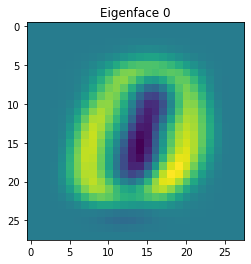

In [18]:
k = 0
plt.imshow(eigenfaces[k])
plt.title('Eigenface {}'.format(k))

In [10]:
np.where(pca.explained_variance_ratio_.cumsum()>0.9)

(array([ 86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
         99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
        125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
        138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]),)

# Fit a Classifier and evaluate performance

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

lda = LinearDiscriminantAnalysis()
lda = lda.fit(X_train_pca, y_train)
y_pred_lda = lda.predict(X_test_pca)
print(classification_report(y_test, y_pred_lda))
print(confusion_matrix(y_test, y_pred_lda, labels=range(10)))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       980
           1       0.89      0.96      0.92      1135
           2       0.92      0.81      0.86      1032
           3       0.88      0.88      0.88      1010
           4       0.86      0.91      0.88       982
           5       0.82      0.80      0.81       892
           6       0.91      0.91      0.91       958
           7       0.91      0.84      0.88      1028
           8       0.81      0.81      0.81       974
           9       0.81      0.87      0.84      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000

[[ 923    1    0    3    2   28   13    2    7    1]
 [   0 1090    3    2    1    3    4    1   30    1]
 [  15   30  835   30   23    5   23   11   53    7]
 [   4    6   28  885    3   28    4   17   24   11]
 [   0   11    4    0  890   